In [1]:
import networkx as nx
from collections import defaultdict

# Betweenness Counterexample

In [2]:
def getGH(jj=1, kk=1, hh=1):
    G = nx.Graph()
    G.add_nodes_from([0,1,2])
    G.add_edges_from([("a","b"), ("b","c"), ("c","d"), ("d",2), (2,1), (1,"a"), ("a",0)])
    labels = defaultdict(lambda: "")
    for i in range(3):
        labels[i] = i
    for i in range(jj):
        G.add_edge("4_{}".format(i), "c")
        G.add_edge("4_{}".format(i), "d")
        labels["4_{}".format(i)]=4
    for i in range(kk):
        G.add_edge("3_{}".format(i), 0)
        labels["3_{}".format(i)]=3
    for i in range(hh):
        G.add_edge("5_{}".format(i), 1)
        labels["5_{}".format(i)]=5
    H = G.copy()
    H.add_edge(0,1,color="r")
    return G, H, labels

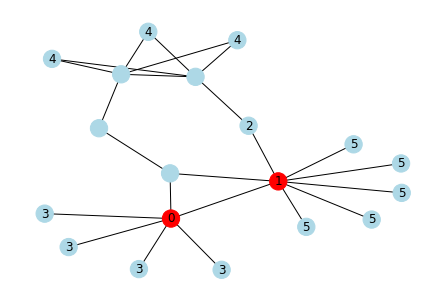

In [3]:
G, H, labels = getGH(3,4,5)
nx.draw(H, nx.kamada_kawai_layout(H), with_labels=True, labels=labels, node_color=["red"]*2+["lightblue"]*(len(G)-2))

Here are two dictionaries whose keys are the nodes of the graphs $G$ and $H$ (the first representative of nodes that have replicas), and whose values are expressions in $h$, $j$, $k$ with the betweenness of the corresponding node in $G$ and $H$.

In [4]:
var('h', 'k', 'j')
pre = {0:      k*(2*h+2*j+k+11)/2,
       1:      (h^2+(2*j+2*k+11)*h+3*k+7)/2,
       2:      ((2*h+2)*j+3*h+k+5)/2,
       "3_0":  0,
       "4_0":  0,
       "5_0":  0,
       "a":    6 + 2/2 + j + 5*k + 5*h/2 + k*j + k*h,
       "b":    2 + 3/2 + 2*j + 3*k/2 + h/2 + k*j,
       "c":    1 + 3/2 + 3*j + k/2 + j*(j-1)/4 + k*j,
       "d":    1 + 2/2 + 2*j + h/2 + j*(j-1)/4 + h*j,
      }

post = {0:     k*(2*h+2*j+k+11)/2,
        1:     (h^2+(2*j+2*k+11)*h+(k+1)*(j+4)+4)/2,
        2:     ((2*h+k+3)*j+3*h+2*k+6)/2,
        "3_0": 0,
        "4_0": 0,
        "5_0": 0,
        "a":   3 + 2/2 + j/2 + 2*k + 3*h/2 + j*k/2,
        "b":   2 + 2/2 + 3*j/2 + k + h/2 + j*k/2,
        "c":   1 + 2/2 + 5*j/2 + j*k/2 + j*(j-1)/4,
        "d":   1 + 2/2 + 5*j/2 + h/2 + j*(j-1)/4 + j*k/2 + j*h
       }

For specific values of $j$,$k$,$r$, actually compute the example graph and numerically evaluate its betweenness.

In [5]:
for jj in range(1,8):
    for kk in range(1,8):
        for hh in range(1,8):
            G,H,labels=getGH(jj,kk,hh)
            before = nx.betweenness_centrality(G, normalized=False)
            after = nx.betweenness_centrality(H, normalized=False)

            # Careful! pre[i] can be a constant (on which Sage is unable to perform substitutions). That is why we add
            # "0*h" (which is harmless by itself)
            for i in [0, 1, 2, "3_0", "4_0", "5_0", "a", "b", "c", "d"]:
                assert (pre[i]+0*h)(h=hh)(k=kk)(j=jj) == before[i], "{}: {} vs. {}".format(i, (pre[i]+0*h)(h=hh)(k=kk)(j=jj), before[i])
                assert (post[i]+0*h)(h=hh)(k=kk)(j=jj) == after[i], "{}: {} vs. {}".format(i, (post[i]+0*h)(h=hh)(k=kk)(j=jj), after[i])

Show that setting $k=2+h$, $j=4h$, and imposing that vertex 0 loses rank w.r.t. vertex 2, that vertex 0 is more important than vertex 1 (top violation), and that vertex 0 is demoted by one position, we get that these conditions hold for ever $h\geq 12$.

In [6]:
kexp=2+h
jexp=4*h

a = [
    # 0 loses 1 position
    (pre[0]>pre[1])(j=jexp)(k=kexp),
    (post[0]<post[1])(j=jexp)(k=kexp),
    
    # 0 loses 1 position
    # Also: counterexample to rank monotonicity w.r.t. 2
    (pre[0]>pre[2])(j=jexp)(k=kexp),
    (post[0]<post[2])(j=jexp)(k=kexp),
    
    (pre[0]>pre["3_0"])(j=jexp)(k=kexp),
    (post[0]>post["3_0"])(j=jexp)(k=kexp),

    (pre[0]>pre["4_0"])(j=jexp)(k=kexp),
    (post[0]>post["4_0"])(j=jexp)(k=kexp),

    (pre[0]>pre["5_0"])(j=jexp)(k=kexp),
    (post[0]>post["5_0"])(j=jexp)(k=kexp),

    (pre[0]>pre["a"])(j=jexp)(k=kexp),
    (post[0]>post["a"])(j=jexp)(k=kexp),

    (pre[0]>pre["b"])(j=jexp)(k=kexp),
    (post[0]>post["b"])(j=jexp)(k=kexp),

    (pre[0]<pre["c"])(j=jexp)(k=kexp),
    (post[0]<post["c"])(j=jexp)(k=kexp),
    
    (pre[0]<pre["d"])(j=jexp)(k=kexp),
    (post[0]<post["d"])(j=jexp)(k=kexp),
    
    # Counterexample to score monotonicity
    (pre[0]==post[0])(j=jexp)(k=kexp),
]

# Maybe there's a better way, but I couldn't find it

x = var('x')
ge_op = (x>=0).operator()
gt_op = (x>0).operator()

bound = 0

# Find lower bound after which all equations are true

for e in a:
    s = solve(e(j=4*h), h)
    assert len(s) > 0
    if not isinstance(s[-1], list): continue # always true
    assert s[-1][-1].operator() == ge_op or s[-1][-1].operator() == gt_op
    bound = max(bound, s[-1][-1].rhs())

print("True for h ≥", math.ceil(bound))

True for h ≥ 12


Show that setting $k=h$, $j=\bigl\lfloor\frac{k^2-4k-15}2\bigr\rfloor$ and imposing that vertex 0 loses rank w.r.t. vertex 2, that vertex 0 is less important than vertex 1 (bottom violation), and that vertex 0 is demoted by one position, we get that these conditions hold for every $k\geq 13$.

In [7]:
jexp=(k^2-4*k-15)/2 # Works with -16, too, for even k
hexp=k

a = [
    (pre[0]<pre[1])(j=jexp)(h=hexp),
    (post[0]<post[1])(j=jexp)(h=hexp),
    
    # 0 loses 1 position
    # Also: counterexample to rank monotonicity w.r.t. 2
    (pre[0]>pre[2])(j=jexp)(h=hexp),
    (post[0]<post[2])(j=jexp)(h=hexp),
    
    (pre[0]>pre["3_0"])(j=jexp)(h=hexp),
    (post[0]>post["3_0"])(j=jexp)(h=hexp),

    (pre[0]>pre["4_0"])(j=jexp)(h=hexp),
    (post[0]>post["4_0"])(j=jexp)(h=hexp),

    (pre[0]>pre["5_0"])(j=jexp)(h=hexp),
    (post[0]>post["5_0"])(j=jexp)(h=hexp),

    (pre[0]>pre["a"])(j=jexp)(h=hexp),
    (post[0]>post["a"])(j=jexp)(h=hexp),

    (pre[0]>pre["b"])(j=jexp)(h=hexp),
    (post[0]>post["b"])(j=jexp)(h=hexp),

    (pre[0]<pre["c"])(j=jexp)(h=hexp),
    (post[0]<post["c"])(j=jexp)(h=hexp),
    
    (pre[0]<pre["d"])(j=jexp)(h=hexp),     
    (post[0]<post["d"])(j=jexp)(h=hexp),
    
    # Counterexample to score monotonicity
    (pre[0]==post[0])(j=jexp)(h=hexp),
]

# Maybe there's a better way, but I couldn't find it

x = var('x')
ge_op = (x>=0).operator()
gt_op = (x>0).operator()

bound = 0

# Find lower bound after which all inequalities and equations are true

for e in a:
    s = solve(e,k)
    assert len(s) > 0
    if not isinstance(s[-1], list): continue # always true 
    assert s[-1][-1].operator() == ge_op or s[-1][-1].operator() == gt_op
    bound = max(bound, s[-1][-1].rhs())

print("True for k ≥", math.ceil(bound))

True for k ≥ 13


In [8]:
def printPassThrough(G, x):
    """
    Conveniently prints the shortest paths between any unordered pair of vertices of G (distinct from x)
    counting how many of them pass through x.
    Vertices whose name is of the form "x_y" are printed only if "y" is 0, with the only exception
    of the source/target pairs that have the form "x_0", "x_1" respectively.

    """
    nodes = list(G.nodes())
    sorted(nodes, key=lambda x: str(x))
    n = len(nodes)
    for i in range(n):
        for j in range(i + 1, n):
            source = str(nodes[i])
            target = str(nodes[j])
            if source == x or target == x:
                continue
            if "_" in source and not source.endswith("_0"):
                continue
            if "_" in target and not target.endswith("_0") and not target.endswith("_1"):
                continue
            if target.endswith("_1") and ("_" not in source or source[:1] != target[:1]):
                continue
            sps = list(nx.all_shortest_paths(G, nodes[i], nodes[j]))
            spsx = [s for s in sps if x in s]
            if len(spsx) > 0:
                print("{:4} -> {:4} \t {}/{} \t{}".format(source, target, len(spsx), len(sps), sps))

In [9]:
print("For instance, let us see the paths through d in H")
printPassThrough(H,"d")

For instance, let us see the paths through d in H
0    -> 4_0  	 1/2 	[[0, 'a', 'b', 'c', '4_0'], [0, 1, 2, 'd', '4_0']]
1    -> c    	 1/2 	[[1, 2, 'd', 'c'], [1, 'a', 'b', 'c']]
1    -> 4_0  	 1/1 	[[1, 2, 'd', '4_0']]
2    -> b    	 1/2 	[[2, 1, 'a', 'b'], [2, 'd', 'c', 'b']]
2    -> c    	 1/1 	[[2, 'd', 'c']]
2    -> 4_0  	 1/1 	[[2, 'd', '4_0']]
c    -> 5_0  	 1/2 	[['c', 'b', 'a', 1, '5_0'], ['c', 'd', 2, 1, '5_0']]
4_0  -> 4_1  	 1/2 	[['4_0', 'c', '4_1'], ['4_0', 'd', '4_1']]
4_0  -> 3_0  	 1/2 	[['4_0', 'c', 'b', 'a', 0, '3_0'], ['4_0', 'd', 2, 1, 0, '3_0']]
4_0  -> 5_0  	 1/1 	[['4_0', 'd', 2, 1, '5_0']]
